In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
from zipfile import ZipFile
file_name = "New Dataset/system_calls.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Unzipped system_calls.zip')

Unzipped system_calls.zip


In [3]:
# Reading counts.txt and storing in panads df
counts_text = pd.read_csv("New Dataset/counts.txt")

In [4]:
# Opening the extracted sys_calls file and replacing ':' with ','

# List that holds the priginal dataset in string format
system_calls = []
i = 0

with open('system_calls.txt') as f:
    while True:
        request = f.readline()
        if(len(request) == 0):
            break
        system_calls.append(request)
        i += 1
for i in range(len(system_calls)):
    system_calls[i] = system_calls[i].replace(":",",")

In [5]:
len(system_calls)
system_calls[0][-1]

'\n'

In [6]:
# Saving replaced file as "dataset.txt"
f = open("dataset.txt", "w")
for i in range(len(system_calls)):
    f.write(system_calls[i])
f.close()

# dataset.txt which contains IDs and system call sequences can now be used as a csv 

In [7]:
# Printing count.txt using column names
counts_text['ID']

0        15403_12_1558061203352552595
1        15403_12_1558061203873994946
2        15403_12_1558061203901555711
3        15403_12_1558061203925100262
4        15403_12_1558061203961228441
                     ...             
46682    15698_12_1558061453221782438
46683    15698_12_1558061453405086529
46684    15698_12_1558061453589605045
46685    15698_12_1558061453776009239
46686    15698_12_1558061453953786306
Name: ID, Length: 46687, dtype: object

In [8]:
# Dictionary that maps request ID to completion time
ID_to_Time_dict = {}

# This loop run through the counts_txt table and maps the keys(IDs) to the values (Time taken)
for i in range(len(counts_text['Time'])):
    ID_to_Time_dict[counts_text['ID'][i]] = counts_text['Time'][i]


In [9]:
len(ID_to_Time_dict)

45413

In [10]:
# List that hold all the request time taken
req_durations = []

file = open("Dataset.txt","w")

def write_to_file(req):
    if req[0] in ID_to_Time_dict:
        file.write(req[0])
        file.write(",")
        file.write(str(ID_to_Time_dict[str(req[0])]))
        req_durations.append(int(ID_to_Time_dict[str(req[0])]))
        file.write(",")
        for i in range(1,len(req)):
            file.write(req[i])
            if i != len(req) -1 :
                file.write(",")
    

for i in range(len(system_calls)):
    write_to_file(system_calls[i].split(","))

file.close()


In [11]:
file = open("Dataset.txt","r")
requests= []
while True:
    line = file.readline()
    if(len(line) == 0):
        break
    requests.append(line.split(","))
    


In [12]:
len(requests)

45413

In [13]:
# List which holds all unique system calls present in the dataset
unique_system_calls = []

for i in range(len(requests)):
    for j in range(2,len(requests[i])):
        if requests[i][j] not in unique_system_calls and requests[i][j] != '$\n':
            unique_system_calls.append(requests[i][j])
        

In [14]:
print(unique_system_calls)
print(len(unique_system_calls))

['getsockname', 'fcntl', 'mmap', 'read', 'newstat', 'open', 'newfstat', 'close', 'brk', 'setitimer', 'rt_sigaction', 'rt_sigprocmask', 'getcwd', 'chdir', 'access', 'getdents', 'sysinfo', 'socket', 'connect', 'poll', 'recvfrom', 'sendto', 'newlstat', 'munmap', 'madvise', 'nanosleep', 'writev', 'write', 'times', 'shutdown', 'accept4']
31


In [15]:
# Mapping system call names to unique integers
system_call_to_value_dict = {}
num = 1
for i in range(len(unique_system_calls)):
    system_call_to_value_dict[str(unique_system_calls[i])] = num
    num += 1

In [16]:
# Dictionary holding the mappings
system_call_to_value_dict 

{'getsockname': 1,
 'fcntl': 2,
 'mmap': 3,
 'read': 4,
 'newstat': 5,
 'open': 6,
 'newfstat': 7,
 'close': 8,
 'brk': 9,
 'setitimer': 10,
 'rt_sigaction': 11,
 'rt_sigprocmask': 12,
 'getcwd': 13,
 'chdir': 14,
 'access': 15,
 'getdents': 16,
 'sysinfo': 17,
 'socket': 18,
 'connect': 19,
 'poll': 20,
 'recvfrom': 21,
 'sendto': 22,
 'newlstat': 23,
 'munmap': 24,
 'madvise': 25,
 'nanosleep': 26,
 'writev': 27,
 'write': 28,
 'times': 29,
 'shutdown': 30,
 'accept4': 31}

In [17]:
# Converting system calls names to unique integers
for i in range(len(requests)):
    for j in range(len(requests[i])):
            if requests[i][j] in system_call_to_value_dict:
                requests[i][j] = int(system_call_to_value_dict[requests[i][j]])

In [18]:
# Statistics of the time taken by the requests

nano = 100000000

num_requests = [i for i in range(1,len(req_durations)+1)]
req_durations = [req_durations[i]/nano for i in range(len(req_durations))]
req_lengths = [len(requests[i]) for i in range(len(requests))]

maximum = 0
minimum = 0
Mean = 0
std_Dev = 0
total = len(req_durations)

maximum = max(req_durations)
minimum = min(req_durations)
mean = statistics.mean(req_durations)
std_Dev = statistics.stdev(req_durations)


print("Maximum: ", maximum)
print("Minimum: ", minimum)
print("Mean: ", mean)
print("Standard Deviation: ", std_Dev)



Maximum:  223.81729449
Minimum:  0.00143172
Mean:  1.3914579438962411
Standard Deviation:  5.113169024522863


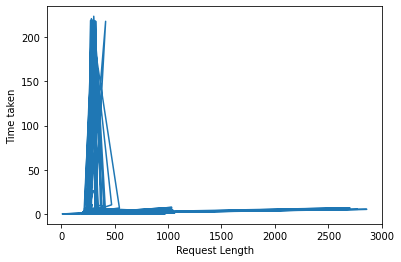

In [20]:
plt.plot(req_lengths,req_durations)
plt.xlabel("Request Length")
plt.ylabel("Time taken")
plt.show()

In [30]:
requests[0]

['15403_12_1558061203352552595',
 '521410813',
 1,
 2,
 2,
 3,
 3,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 9,
 9,
 10,
 11,
 12,
 3,
 13,
 14,
 10,
 2,
 15,
 6,
 7,
 16,
 16,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 16,
 16,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 16,
 16,
 8,
 17,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,

In [59]:
anomaly = []
normal = []
threshold = mean + (1* std_Dev)

def check_anomaly(arr):
    temp = []
    time = int(arr[1])/nano
    if time > threshold:
        for i in range(2,len(arr)):
            temp.append(arr[i])
        return temp
    
for i in range(len(requests)):
    array = check_anomaly(requests[i])
    if array != None:
           anomaly.append(array)



In [60]:
len(anomaly)

48

In [61]:
i = 0
for t in req_durations:
    if t > threshold:
        i += 1
print(i)

48
